In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

1. Binary    -> 2D Matrix Binary (Boolean)
2. Grayscale -> 2D Matrix uint8
3. Color     -> 3D Matrix uint8

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


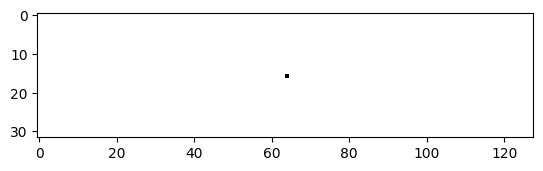

In [ ]:
imBGR = np.zeros((32, 128), dtype=bool)
print(imBGR)
rows_center = imBGR.shape[0] // 2
columns_center = imBGR.shape[1] // 2

imBGR[rows_center, columns_center] = True
plt.imshow(imBGR, cmap='binary')
plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


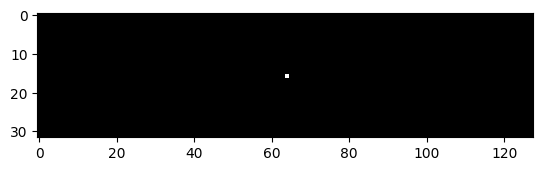

In [ ]:
#Generate a 32 column by 128 column matrix as a greyscale image. Change the centre pixel to 255.

imBGR = np.zeros((32, 128), dtype='uint8')
print(imBGR)
rows_center = imBGR.shape[0] // 2
columns_center = imBGR.shape[1] // 2

imBGR[rows_center, columns_center] = 255
plt.imshow(imBGR, cmap='gray')
plt.show()

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


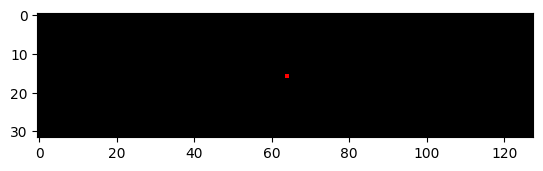

In [ ]:
#Generate a 32 column by 128 column matrix as an RGB image. Change the centre pixel td RED.

imBGR = np.zeros((32, 128, 3), dtype='uint8')
print(imBGR)
rows_center = imBGR.shape[0] // 2
columns_center = imBGR.shape[1] // 2

imBGR[rows_center, columns_center] = [255, 0, 0]
plt.imshow(imBGR)
plt.show()

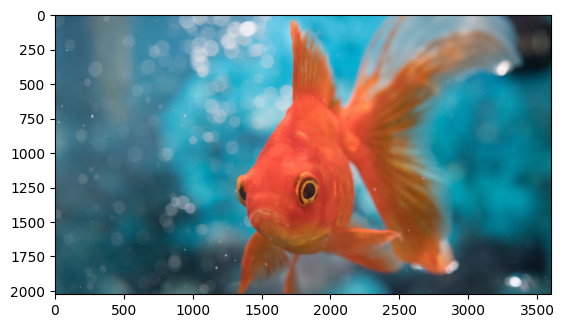

In [ ]:
#Loading an image from disk and diplaying it as RGB
imBGR = cv2.imread('images/goldfish.jpg')

imRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)
plt.imshow(imRGB)
plt.show()